In [5]:
import pandas as pd

df = pd.read_csv("heart.csv")


print("Preview of dataset:")
display(df.head())


print("Dataset Info:")
df.info()


print(f"\nDataset Shape: {df.shape}")


Preview of dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1190 non-null   int64  
 1   sex       1190 non-null   int64  
 2   cp        1190 non-null   int64  
 3   trestbps  1190 non-null   int64  
 4   chol      1190 non-null   int64  
 5   fbs       1190 non-null   int64  
 6   restecg   1190 non-null   int64  
 7   thalach   1190 non-null   int64  
 8   exang     1190 non-null   int64  
 9   oldpeak   1190 non-null   float64
 10  slope     1190 non-null   int64  
 11  target    1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB

Dataset Shape: (1190, 12)


In [7]:

duplicates = df.duplicated()

print(f"\nTotal duplicate records: {duplicates.sum()}")

df[duplicates]



Total duplicate records: 272


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1



Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64


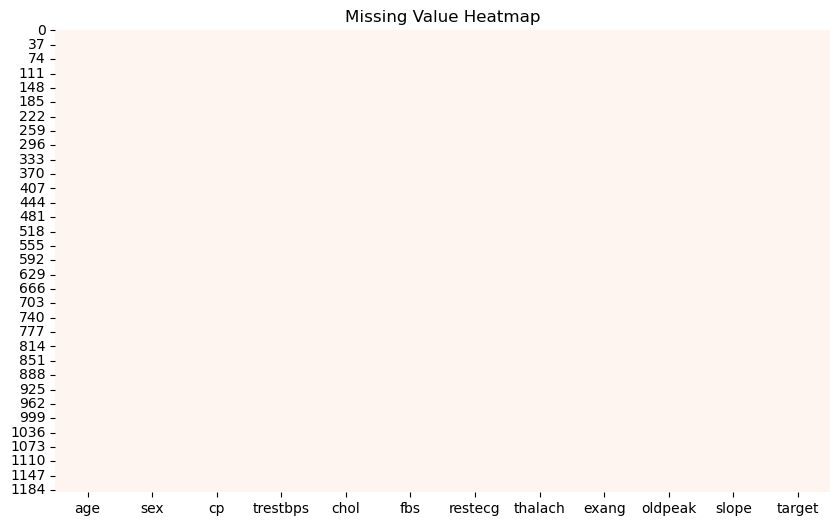

In [9]:

missing = df.isnull().sum()

print("\nMissing Values per Column:")
print(missing)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Value Heatmap")
plt.show()


In [11]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers


outlier_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print("\nOutliers (using IQR) for continuous numeric features only:")
for col in outlier_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")



Outliers (using IQR) for continuous numeric features only:
age: 0 outliers
trestbps: 37 outliers
chol: 193 outliers
thalach: 1 outliers
oldpeak: 11 outliers


In [16]:
print("Above one got 193 outlier but i dont want to remove because it maybe real example which patient who high chol")

Above one got 193 outlier but i dont want to remove because it maybe real example which patient who high chol


In [13]:
import pandas as pd


df = pd.read_csv("heart.csv")


original_rows = df.shape[0]
print(f"Original records: {original_rows}")


duplicate_count = df.duplicated().sum()


df = df.drop_duplicates()

print(f"Duplicate records removed: {duplicate_count}")


missing_count = df.isnull().any(axis=1).sum()


df = df.dropna()

print(f"Records with missing values removed: {missing_count}")


def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']


outlier_mask = pd.Series([False] * df.shape[0], index=df.index)

for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])

outlier_count = outlier_mask.sum()


df = df[~outlier_mask]

print(f"Outlier records removed (excluding 'chol'): {outlier_count}")

final_rows = df.shape[0]
total_removed = original_rows - final_rows

print(f"\n✅ Final cleaned dataset shape: {df.shape}")
print(f"Total records removed: {total_removed}")


Original records: 1190
Duplicate records removed: 272
Records with missing values removed: 0
Outlier records removed (excluding 'chol'): 44

✅ Final cleaned dataset shape: (874, 12)
Total records removed: 316


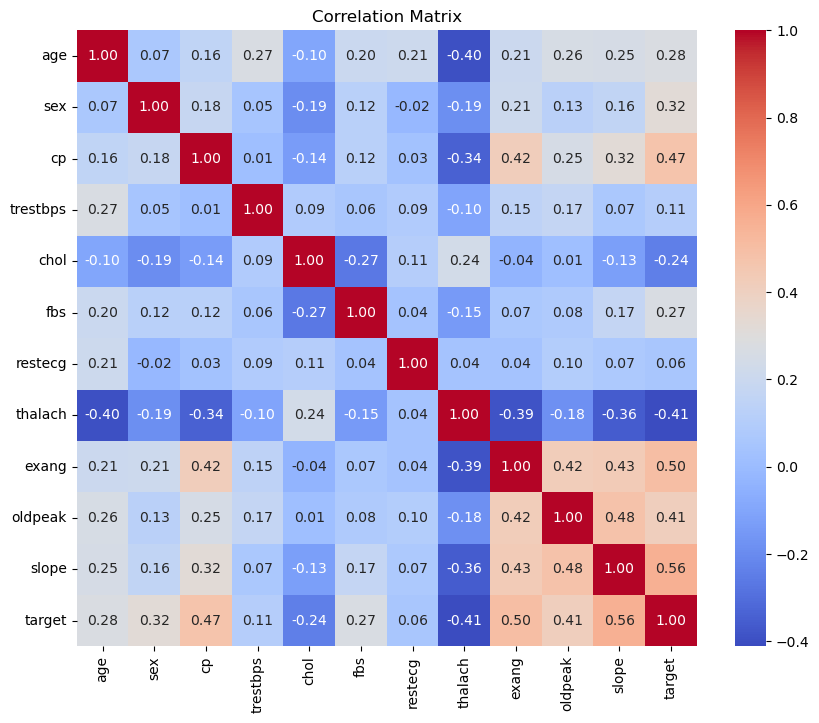

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


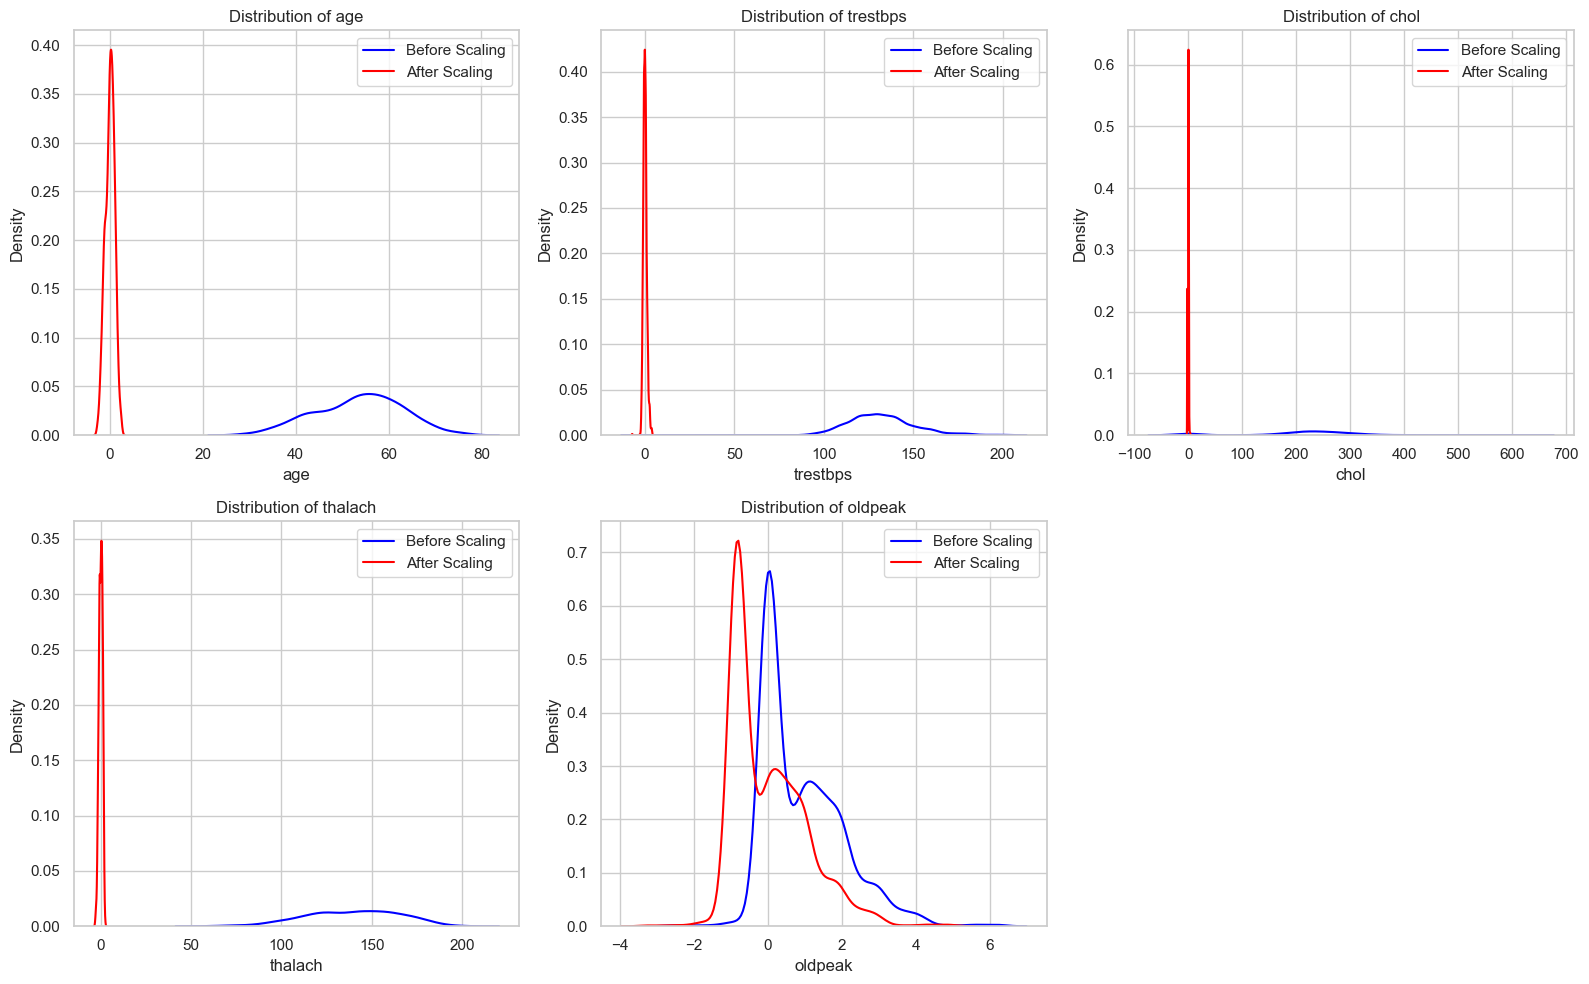

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("heart.csv")


features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

original_data = df[features]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_data)


scaled_df = pd.DataFrame(scaled_data, columns=features)


sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))


for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(original_data[col], label='Before Scaling', color='blue')
    sns.kdeplot(scaled_df[col], label='After Scaling', color='red')
    plt.title(f'Distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd


# Load data
df = pd.read_csv("heart.csv")
original_rows = df.shape[0]
print(f"Original records: {original_rows}")

# Remove duplicates
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicate records removed: {duplicate_count}")

# Remove rows with missing values
missing_count = df.isnull().any(axis=1).sum()
df = df.dropna()
print(f"Records with missing values removed: {missing_count}")

# Remove outliers using IQR method (excluding 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])

outlier_count = outlier_mask.sum()
df = df[~outlier_mask]
print(f"Outlier records removed (excluding 'chol'): {outlier_count}")

final_rows = df.shape[0]
print(f"\n Final cleaned dataset shape: {df.shape}")
print(f"Total records removed: {original_rows - final_rows}")


X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train SVM model
svm_model = SVC(C=0.1,kernel='rbf', random_state=42)  # You can change kernel to 'linear', 'poly', etc.
svm_model.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluation
print("\n\n\t\tEvaluate Metrics for SVM \n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Original records: 1190
Duplicate records removed: 272
Records with missing values removed: 0
Outlier records removed (excluding 'chol'): 44

 Final cleaned dataset shape: (874, 12)
Total records removed: 316


		Evaluate Metrics for SVM 

Accuracy: 0.8857142857142857
Precision: 0.8865979381443299
Recall: 0.9052631578947369
F1 Score: 0.8958333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87        80
           1       0.89      0.91      0.90        95

    accuracy                           0.89       175
   macro avg       0.89      0.88      0.88       175
weighted avg       0.89      0.89      0.89       175



In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load data
df = pd.read_csv("heart.csv")
original_rows = df.shape[0]
print(f"Original records: {original_rows}")

# Remove duplicates
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicate records removed: {duplicate_count}")

# Remove rows with missing values
missing_count = df.isnull().any(axis=1).sum()
df = df.dropna()
print(f"Records with missing values removed: {missing_count}")

# Remove outliers using IQR method (excluding 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])

outlier_count = outlier_mask.sum()
df = df[~outlier_mask]
print(f"Outlier records removed (excluding 'chol'): {outlier_count}")

final_rows = df.shape[0]
print(f"\n Final cleaned dataset shape: {df.shape}")
print(f"Total records removed: {original_rows - final_rows}")


X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Step 11: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Step 12: Evaluate
y_pred = model.predict(X_test)
print("\n\n\t\tEvaluate Metrics for LogisticRegression \n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Original records: 1190
Duplicate records removed: 272
Records with missing values removed: 0
Outlier records removed (excluding 'chol'): 44

 Final cleaned dataset shape: (874, 12)
Total records removed: 316


		Evaluate Metrics for LogisticRegression 

Accuracy: 0.8342857142857143
Precision: 0.8666666666666667
Recall: 0.8210526315789474
F1 Score: 0.8432432432432433

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        80
           1       0.87      0.82      0.84        95

    accuracy                           0.83       175
   macro avg       0.83      0.84      0.83       175
weighted avg       0.84      0.83      0.83       175



Original records: 1190
Duplicate records removed: 272
Records with missing values removed: 0
Outlier records removed (excluding 'chol'): 44

 Final cleaned dataset shape: (874, 12)
Total records removed: 316


		Evaluate Metrics for KNN 


 Evaluation Results:
Accuracy: 0.8685714285714285
Precision: 0.9090909090909091
Recall: 0.8421052631578947
F1 Score: 0.8743169398907104

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        80
           1       0.91      0.84      0.87        95

    accuracy                           0.87       175
   macro avg       0.87      0.87      0.87       175
weighted avg       0.87      0.87      0.87       175



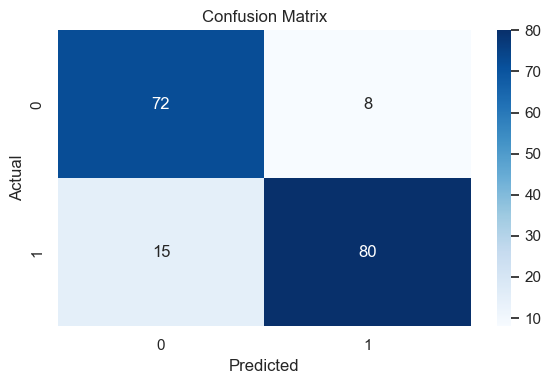

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("heart.csv")
original_rows = df.shape[0]
print(f"Original records: {original_rows}")

# Remove duplicates
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicate records removed: {duplicate_count}")

# Remove rows with missing values
missing_count = df.isnull().any(axis=1).sum()
df = df.dropna()
print(f"Records with missing values removed: {missing_count}")

# Remove outliers using IQR method (excluding 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])

outlier_count = outlier_mask.sum()
df = df[~outlier_mask]
print(f"Outlier records removed (excluding 'chol'): {outlier_count}")

final_rows = df.shape[0]
print(f"\n Final cleaned dataset shape: {df.shape}")
print(f"Total records removed: {original_rows - final_rows}")


X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train KNN model 
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = knn.predict(X_test)

# ==================== 3. Evaluation ====================
print("\n\n\t\tEvaluate Metrics for KNN \n")
print("\n Evaluation Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [21]:
pip install scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Model Comparison:

               Model  Accuracy  Precision   Recall  F1 Score
          KNN (k=13)  0.868571   0.909091 0.842105  0.874317
Logistic Regression   0.834286   0.866667 0.821053  0.843243
         SVM (C=0.1)  0.885714   0.886598 0.905263  0.895833


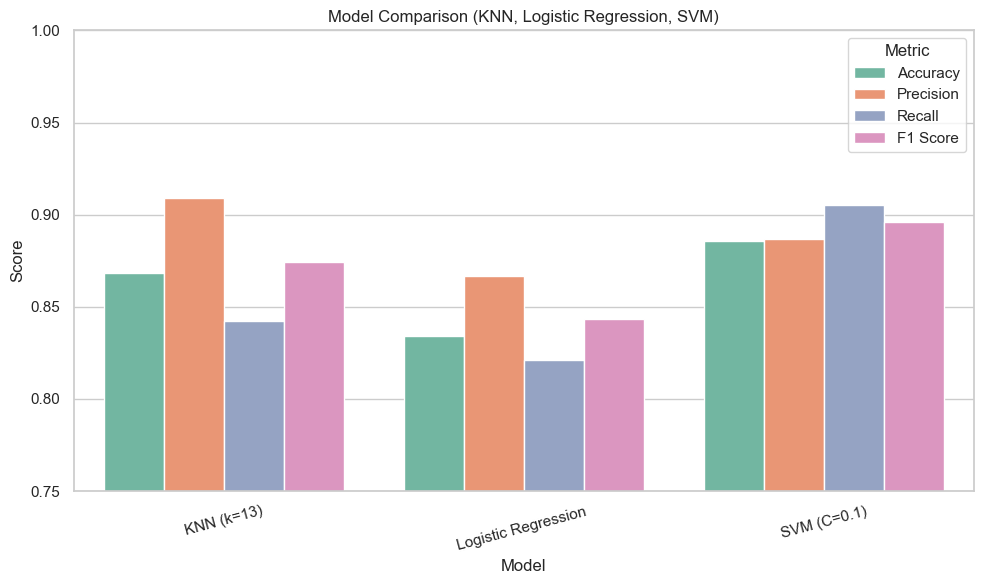

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# Load and clean dataset
df = pd.read_csv("heart.csv")
df = df.drop_duplicates().dropna()

# Remove outliers using IQR (except 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])
df = df[~outlier_mask]

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=13)
logreg = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(kernel='rbf', C=0.1, random_state=42)

# Fit and predict
knn.fit(X_train_smote, y_train_smote)
y_pred_knn = knn.predict(X_test)

logreg.fit(X_train_smote, y_train_smote)
y_pred_logreg = logreg.predict(X_test)

svm.fit(X_train_smote, y_train_smote)
y_pred_svm = svm.predict(X_test)


models = {
    "KNN (k=13)": y_pred_knn,
    "Logistic Regression ": y_pred_logreg,
    "SVM (C=0.1)": y_pred_svm
}


results = []

for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])


df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])


print("Model Comparison:\n")
print(df_results.to_string(index=False))


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

df_melted = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="Set2")

plt.title("Model Comparison (KNN, Logistic Regression, SVM)")
plt.ylim(0.75, 1.0)
plt.legend(title="Metric")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



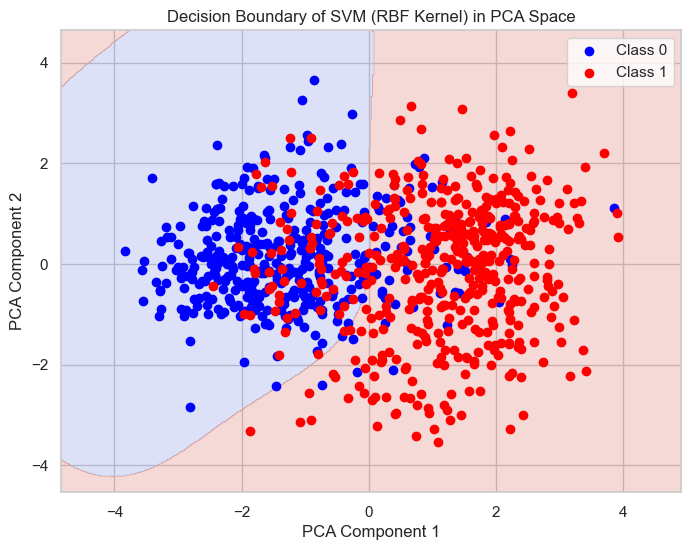

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# X is features，y target (0.1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA dimensionality reduction to 2D (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. train SVM using rbf
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)  # 决策区域
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='blue', label='Class 0')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='red', label='Class 1')
plt.title("Decision Boundary of SVM (RBF Kernel) in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


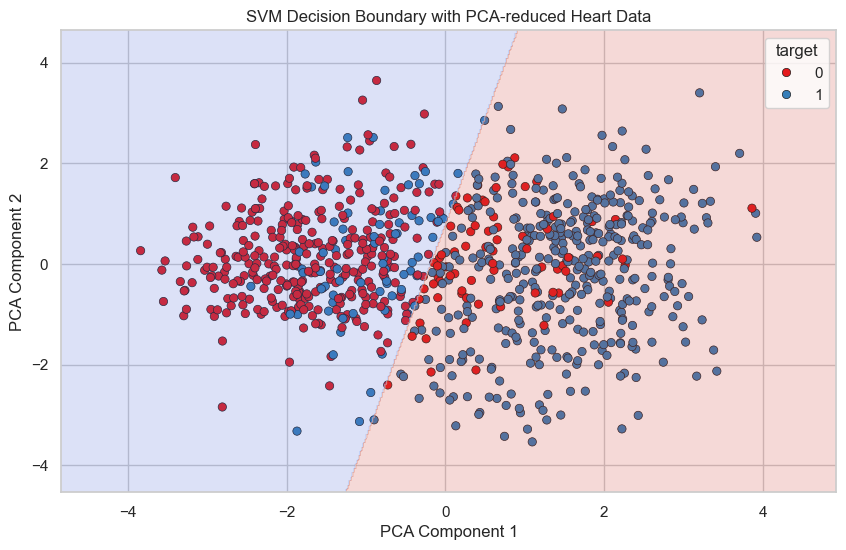

In [29]:

clf = SVC(kernel='linear', C=1.0)
clf.fit(X_pca, y)


plt.figure(figsize=(10, 6))


sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", edgecolor="k")


import numpy as np
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.coolwarm)

plt.title("SVM Decision Boundary with PCA-reduced Heart Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [1]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

st.set_page_config(page_title="Heart Disease Prediction", layout="centered")

# Header
st.title("❤️ Heart Disease Prediction Using KNN")
st.markdown("A data preprocessing and machine learning demo with K-Nearest Neighbors and SMOTE.")

# Load data
df = pd.read_csv("C:/Users/User/OneDrive/Documents/heart.csv") 
original_rows = df.shape[0]
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
missing_count = df.isnull().any(axis=1).sum()
df = df.dropna()

# Remove outliers (except 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])
outlier_count = outlier_mask.sum()
df = df[~outlier_mask]
final_rows = df.shape[0]

# Cleaning Summary
with st.expander("📋 Data Cleaning Summary"):
    st.write(f"**Original records**: {original_rows}")
    st.write(f"**Duplicate records removed**: {duplicate_count}")
    st.write(f"**Missing records removed**: {missing_count}")
    st.write(f"**Outliers removed (excluding 'chol')**: {outlier_count}")
    st.write(f"**Final cleaned records**: {final_rows}")
    st.write(f"**Total records removed**: {original_rows - final_rows}")

# Data splitting and preprocessing
X = df.drop("target", axis=1)
y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_smote, y_train_smote)
y_pred = knn.predict(X_test)

# Evaluation
st.subheader("📊 Evaluation Metrics")
col1, col2 = st.columns(2)

with col1:
    st.metric("Accuracy", f"{accuracy_score(y_test, y_pred):.2f}")
    st.metric("Precision", f"{precision_score(y_test, y_pred):.2f}")
with col2:
    st.metric("Recall", f"{recall_score(y_test, y_pred):.2f}")
    st.metric("F1 Score", f"{f1_score(y_test, y_pred):.2f}")

# Classification Report
st.text("Classification Report:")
st.text(classification_report(y_test, y_pred))

# Confusion Matrix
st.subheader("🧾 Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
st.pyplot(fig)


2025-08-02 19:08:43.808 
  command:

    streamlit run C:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

Original records: 1190
Duplicate records removed: 272
Records with missing values removed: 0
Outlier records removed (excluding 'chol'): 44

✅ Final cleaned dataset shape: (874, 12)
Total records removed: 316


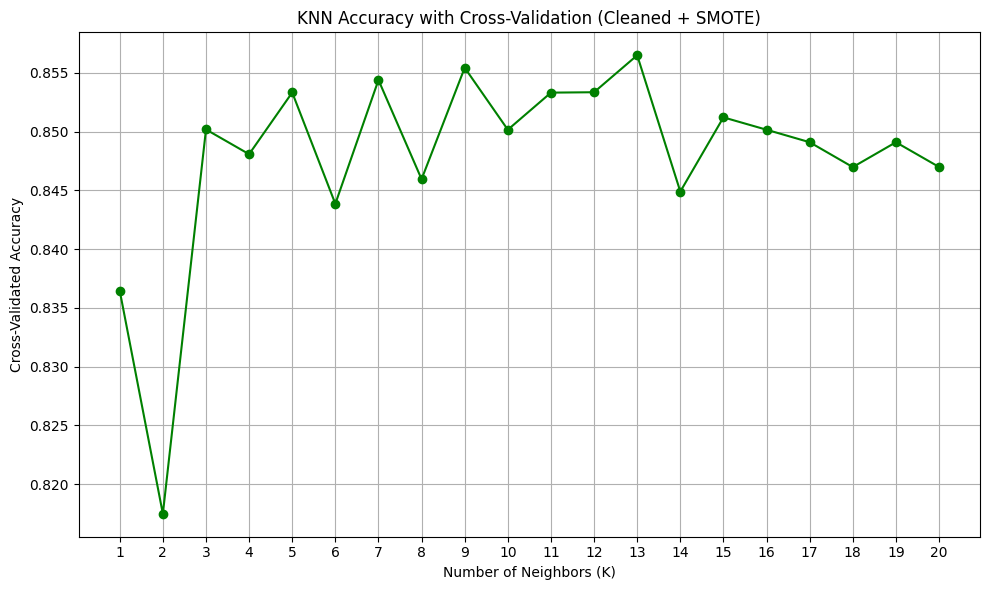


✅ Best K is: 13 with Accuracy: 0.8565


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ==================== 1. Data Cleaning ====================

# Load dataset
df = pd.read_csv("heart.csv")
original_rows = df.shape[0]
print(f"Original records: {original_rows}")

# Remove duplicates
duplicate_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicate records removed: {duplicate_count}")

# Remove rows with missing values
missing_count = df.isnull().any(axis=1).sum()
df = df.dropna()
print(f"Records with missing values removed: {missing_count}")

# Remove outliers using IQR (excluding 'chol')
def is_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

continuous_cols = ['age', 'trestbps', 'thalach', 'oldpeak']
outlier_mask = pd.Series([False] * df.shape[0], index=df.index)
for col in continuous_cols:
    outlier_mask = outlier_mask | is_outlier_iqr(df[col])

outlier_count = outlier_mask.sum()
df = df[~outlier_mask]
print(f"Outlier records removed (excluding 'chol'): {outlier_count}")

final_rows = df.shape[0]
print(f"\n✅ Final cleaned dataset shape: {df.shape}")
print(f"Total records removed: {original_rows - final_rows}")

# ==================== 2. Cross-Validation with SMOTE ====================

# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE to the whole dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Use stratified 10-fold CV
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate K from 1 to 20
k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_balanced, y_balanced, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', color='green')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy with Cross-Validation (Cleaned + SMOTE)")
plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# Best K result
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"\n✅ Best K is: {best_k} with Accuracy: {max(cv_scores):.4f}")